In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [8]:
# Load the dataset
df = pd.read_csv('new_health_data_tips.csv')
df

,age,height,weight,activity_level,diet_quality,smoking_status,alcohol_consumption,sleep_hours,stress_level,health_tips
0,62,199,88,Low,Poor,Yes,No,6,Low,Consider quitting smoking to improve your over...
1,65,197,54,Moderate,Average,No,Yes,5,High,Limit alcohol consumption to maintain liver he...
2,71,188,66,High,Average,No,No,4,Medium,Ensure you get at least 7-8 hours of sleep eac...
3,18,194,63,Moderate,Good,No,No,6,High,Ensure you get at least 7-8 hours of sleep eac...
4,21,167,99,High,Average,Yes,Yes,7,Low,Consider quitting smoking to improve your over...
...,...,...,...,...,...,...,...,...,...,...
9995,47,199,96,Moderate,Average,Yes,No,9,Low,Consider quitting smoking to improve your over...
9996,43,175,93,High,Poor,No,Yes,4,Medium,Limit alcohol consumption to maintain liver he...
9997,37,157,79,High,Poor,Yes,No,5,Medium,Consider quitting smoking to improve your over...
9998,50,160,72,Low,Average,No,Yes,9,High,Limit alcohol consumption to maintain liver he...


In [9]:
# Data preprocessing
# Convert health_tips to a list of tips
df['health_tips'] = df['health_tips'].str.split(' , ')

In [10]:
# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(df['health_tips'])

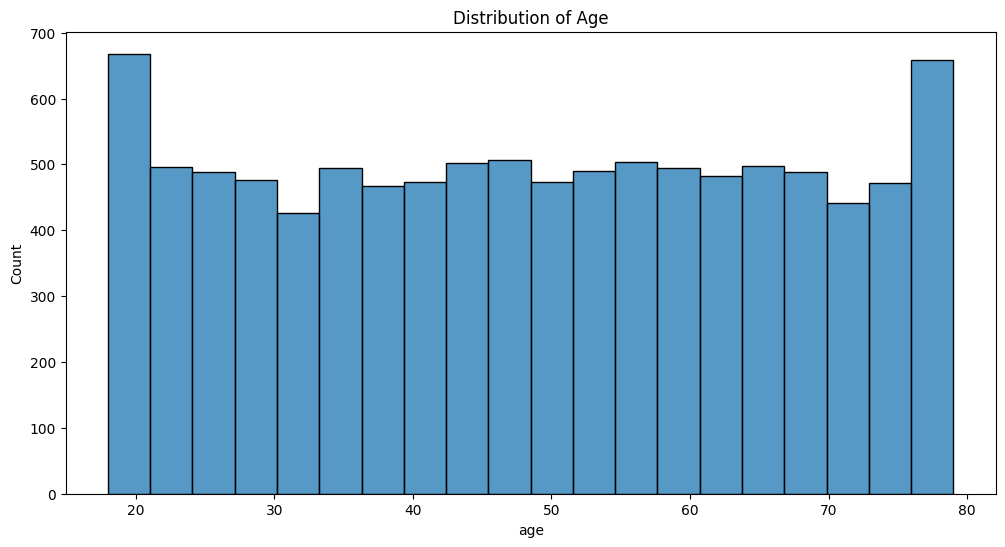

In [11]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.show()

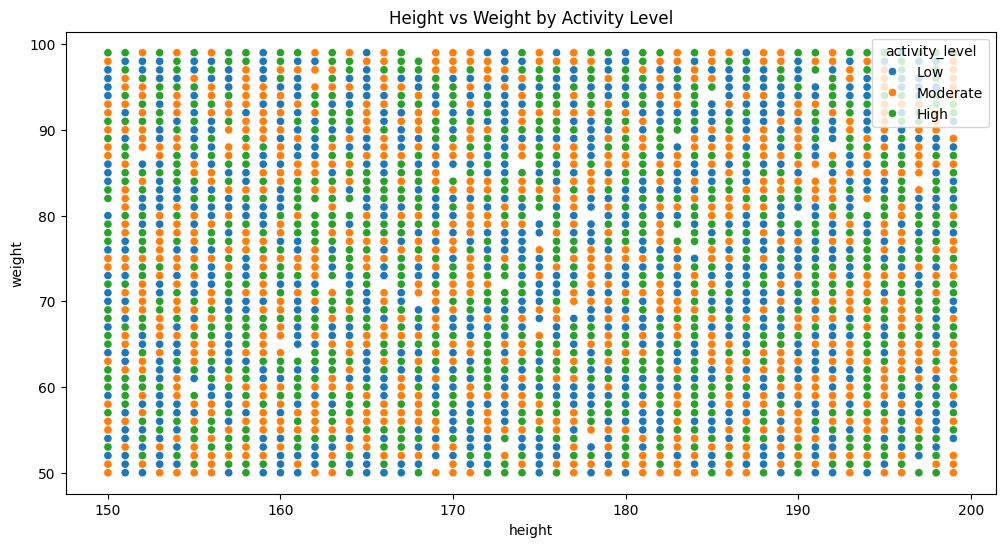

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='height', y='weight', hue='activity_level', data=df)
plt.title('Height vs Weight by Activity Level')
plt.show()

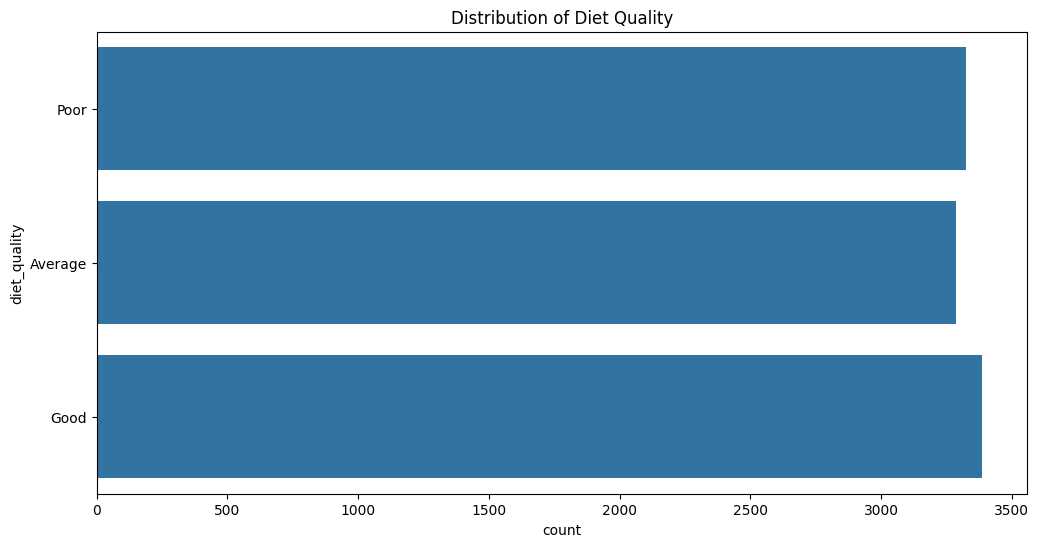

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y='diet_quality', data=df)
plt.title('Distribution of Diet Quality')
plt.show()

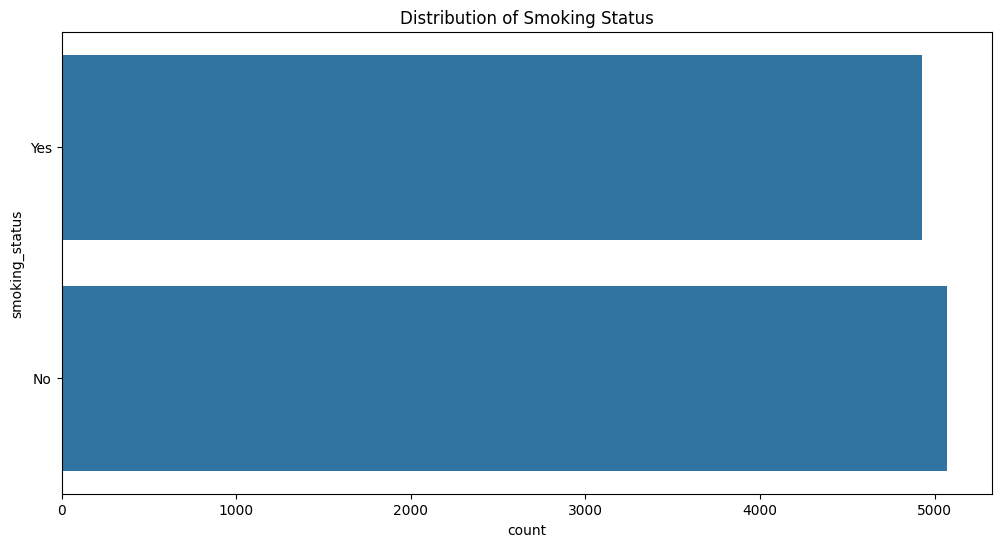

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y='smoking_status', data=df)
plt.title('Distribution of Smoking Status')
plt.show()

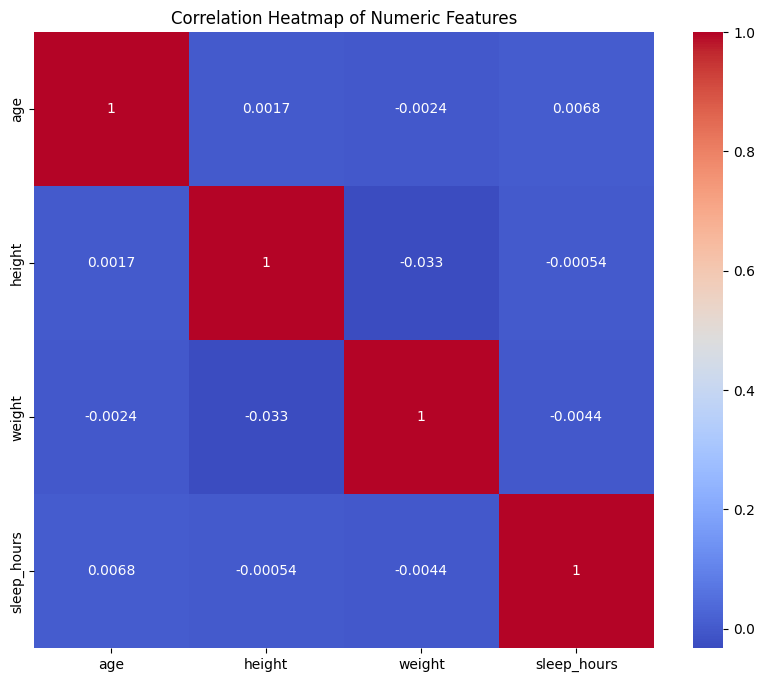

In [15]:
# Correlation heatmap
numeric_cols = ['age', 'height', 'weight', 'sleep_hours']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [16]:
# Health tips distribution
all_tips = [tip for tips in df['health_tips'] for tip in tips]
tip_counts = pd.Series(all_tips).value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_772\3173441818.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


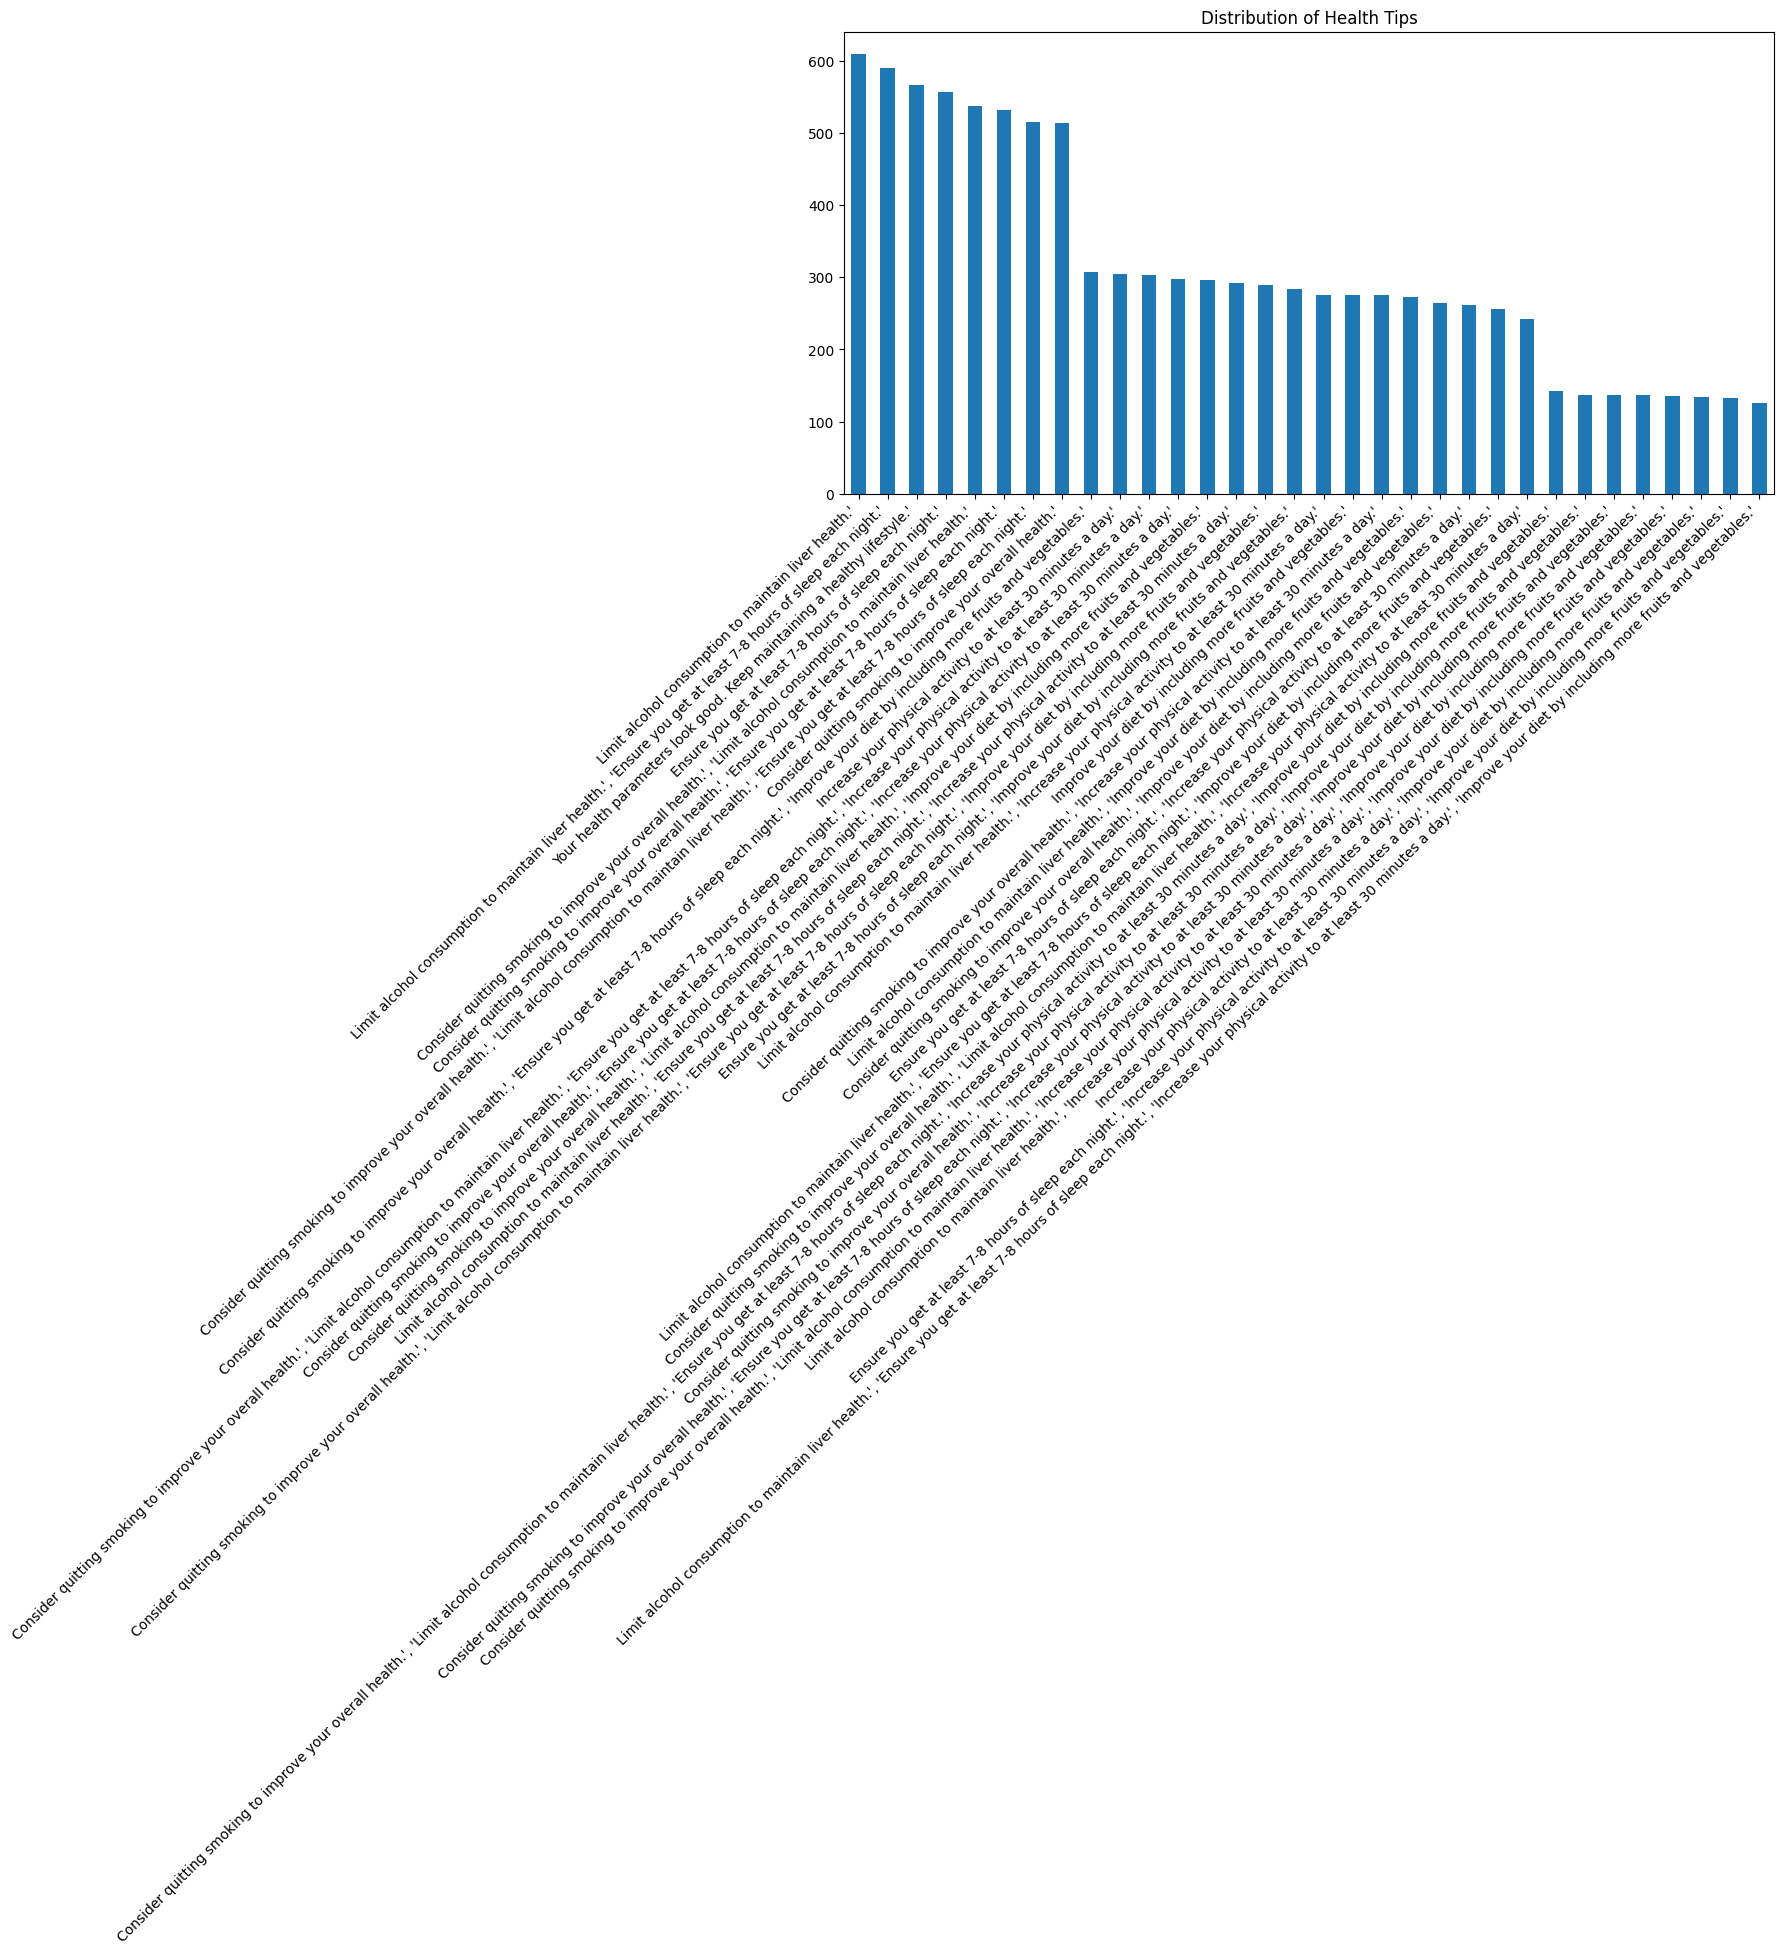

In [17]:
plt.figure(figsize=(12, 6))
tip_counts.plot(kind='bar')
plt.title('Distribution of Health Tips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
# Prepare features and target
X = df.drop('health_tips', axis=1)
y = df['health_tips']

In [19]:
# Encode categorical variables
X = pd.get_dummies(X, columns=['activity_level', 'diet_quality', 'smoking_status', 'alcohol_consumption', 'stress_level'])

In [20]:
# Prepare multi-label target
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y)

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [22]:
# Train a multi-label Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_rf = MultiOutputClassifier(rf_classifier)


In [23]:
multi_target_rf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [29]:
# # Save the model
# with open('health_tips_model.pkl', 'wb') as f:
#     pickle.dump((multi_target_rf, mlb, X.columns), f)

In [24]:
# Save the model and MLB
with open('health_tips.pkl', 'wb') as f:
    pickle.dump((multi_target_rf, mlb, X.columns), f)

In [25]:
# Make predictions
y_pred = multi_target_rf.predict(X_test)

In [26]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

Classification Report:
                                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                                                                                                                                Consider quitting smoking to improve your overall health.'       1.00      1.00      1.00        93
                                                                                                                                                                                      Consider quitting smoking to improve your overall health.', 'Ensure you get at least 7-8 hours of sleep each night

In [27]:
# Feature importance
feature_importance = multi_target_rf.estimators_[0].feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

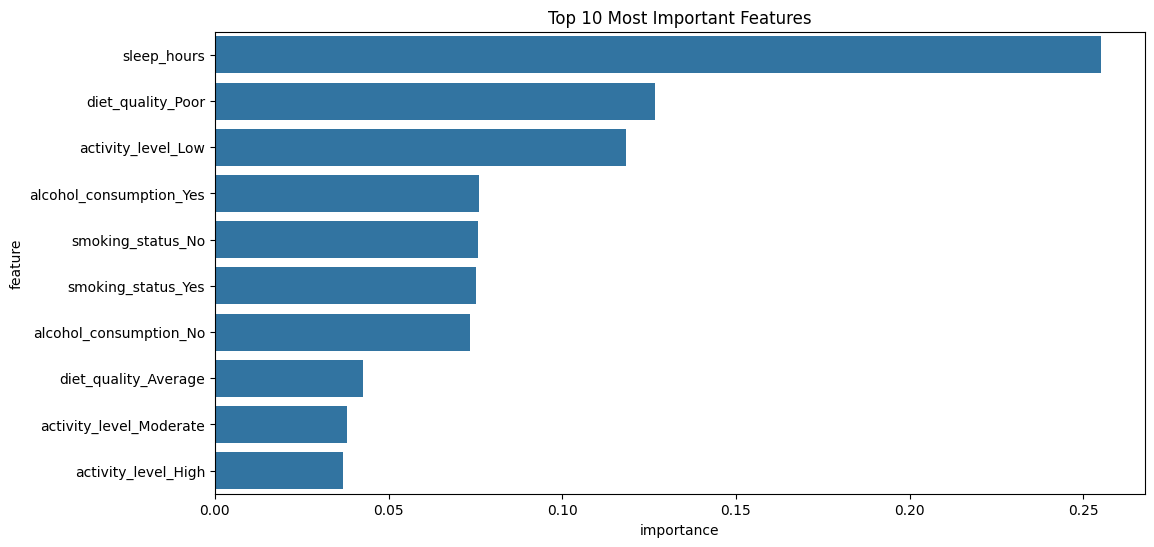

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.show()